# Problem Statement

Aerofit, a prominent player in the fitness equipment industry, is facing a challenge in understanding the characteristics of its target audience for each type of treadmill they offer. The goal is to enhance customer recommendations and better cater to new customers by investigating potential differences across their treadmill products concerning customer characteristics.

The dataset provided contains information on individuals who purchased AeroFit treadmills in the past three months, including details such as the product purchased, age, gender, education, marital status, usage, income, fitness rating, and expected weekly miles.

The key tasks involve importing and analyzing the dataset, detecting outliers, exploring the impact of features like marital status and age on product purchase, calculating marginal probabilities, checking correlations among different factors, and finally, providing actionable insights and recommendations based on the findings.

The project's success will be evaluated based on the comprehensive understanding of the dataset, effective visualization of customer profiles, identification of outliers and patterns, and the ability to derive meaningful insights that can guide business decisions. The ultimate goal is to develop actionable recommendations in simple language that can be easily understood by stakeholders and lead to improvements in customer targeting and satisfaction.

In [134]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv("aerofit_treadmill.txt")

In [136]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [137]:
df.shape 

(180, 9)

There are 180 rows(records) and 9 columns(fields)

In [138]:
df.info() # datatypes and count of null values for every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [139]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There are no missing values in the entire dataset.

## DESCRIPTIVE STATS

In [140]:
# summary statistics
describe_stats = df.describe()
describe_stats

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [141]:
#Mean and median difference for numerical columns
mean_median_diff = describe_stats.loc['mean'] - describe_stats.loc['50%'] 
mean_median_diff

Age             2.788889
Education      -0.427778
Usage           0.455556
Fitness         0.311111
Income       3123.077778
Miles           9.194444
dtype: float64

Positive differences suggest a right-skewed distribution, while negative differences suggest a left-skewed distribution.

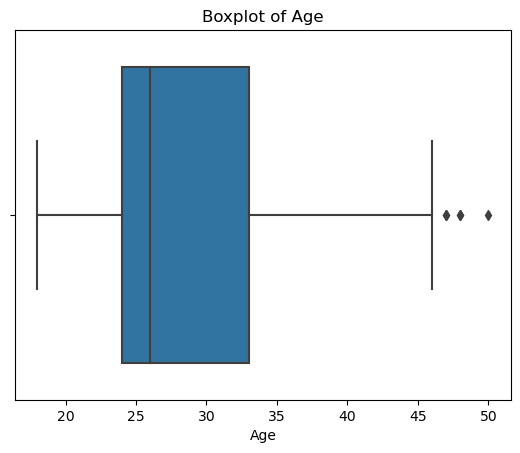

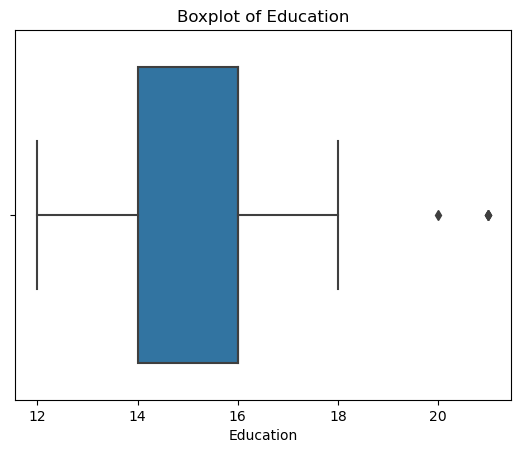

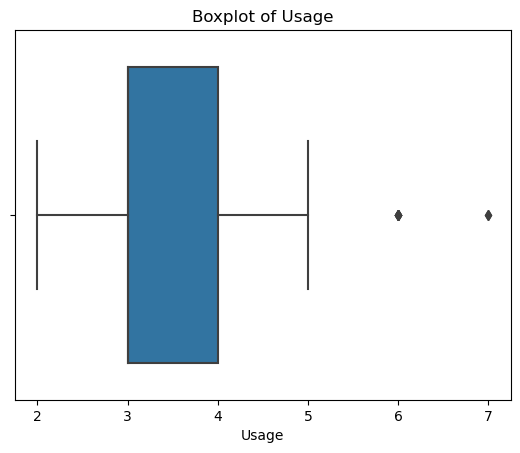

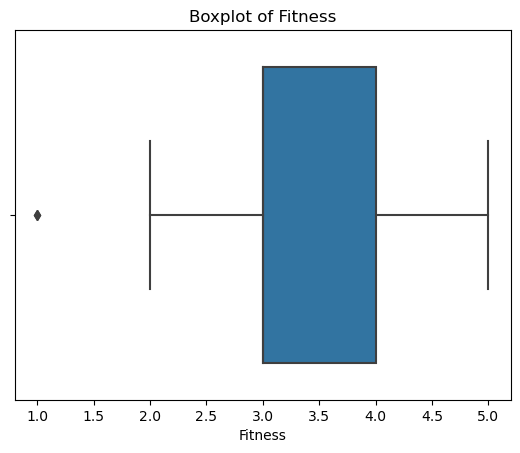

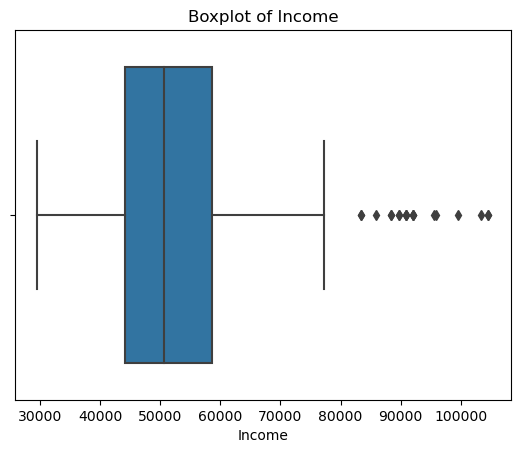

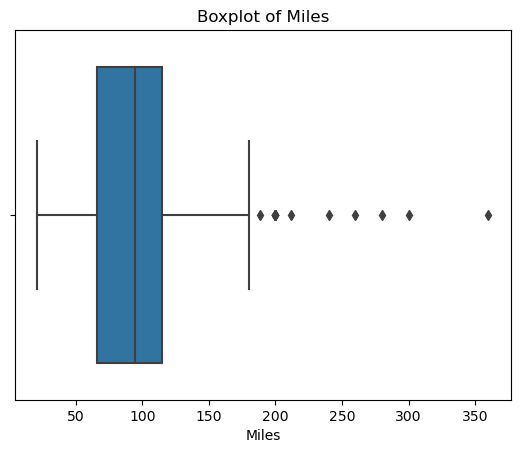

In [142]:
numerical_columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

for column in numerical_columns:
    sns.boxplot(data = df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

Income and miles columns have high number of outliers while fitness, usage and age have very few outliers. We can also infer it using mean and median difference.

In [143]:
#Outliers Treatment

df1 = df.copy() # To preserve original dataset

#Extracting the data between 5 percentile and 95 percentile 
for column in numerical_columns:
    lower = np.quantile(df1[column], 0.05)
    upper = np.quantile(df1[column], 0.95)
    df1[column] = np.clip(df1[column], lower, upper)

In [144]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,20.0,Male,14,Single,3.0,4,34053.15,112
1,KP281,20.0,Male,15,Single,2.0,3,34053.15,75
2,KP281,20.0,Female,14,Partnered,4.0,3,34053.15,66
3,KP281,20.0,Male,14,Single,3.0,3,34053.15,85
4,KP281,20.0,Male,14,Partnered,4.0,2,35247.00,47


## ANALYSIS USING GRAPHS

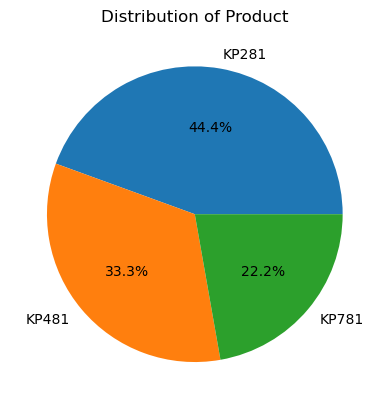

In [145]:
plt.pie(df['Product'].value_counts(), autopct="%1.1f%%", labels = df['Product'].value_counts().index)
plt.title('Distribution of Product')
plt.show()




● The KP281(44.4%) is an entry-level treadmill that sells for $1,500.


● The KP481(33.3%) is for mid-level runners that sell for $1,750.


● The KP781(22.2%) treadmill has advanced features that sell for $2,500.

<Axes: xlabel='Age', ylabel='Count'>

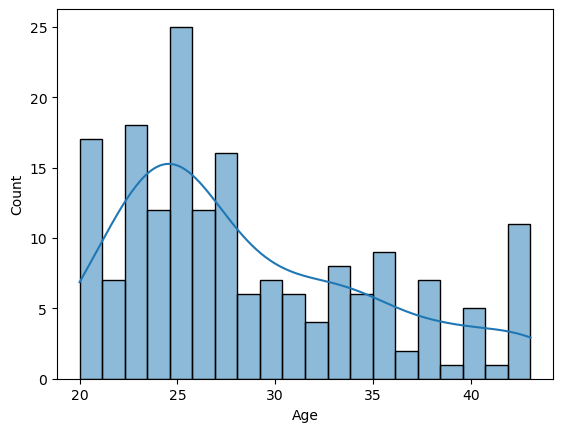

In [146]:
#Count plot for Age column
sns.histplot(data=df1, x='Age', bins=20, kde=True)

● Ages 20-28 sees a peak in the products sold, while the graph steadily declines from age 30

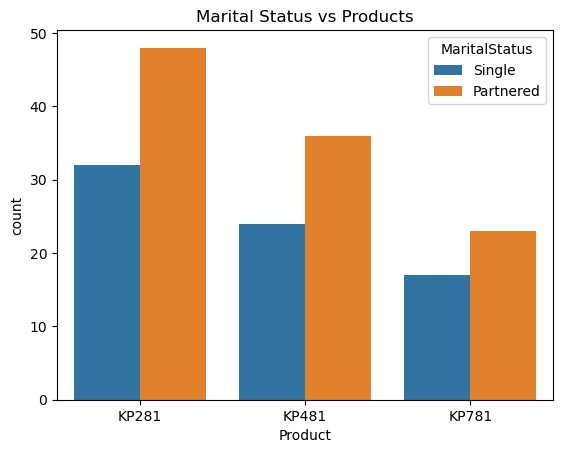

In [147]:
#count plot for Product vs maritalstatus
sns.countplot(data=df1, x='Product', hue='MaritalStatus')
plt.title("Marital Status vs Products")
plt.show()

Marital status plays an important part in terms of products purchased. Partnered people have purchased more trademills though the ratio of all 3 products is almost similar.

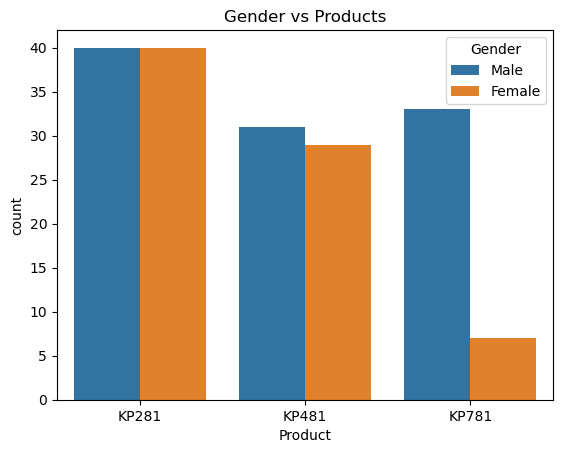

In [148]:
#count plot for Product vs Gender
sns.countplot(data=df1, x='Product', hue='Gender')
plt.title("Gender vs Products")
plt.show()

Both genders have preferred "KP281" and "KP481" equally, but the sales of "KP781" are considerably high for male category, though the price of the product is highest.  

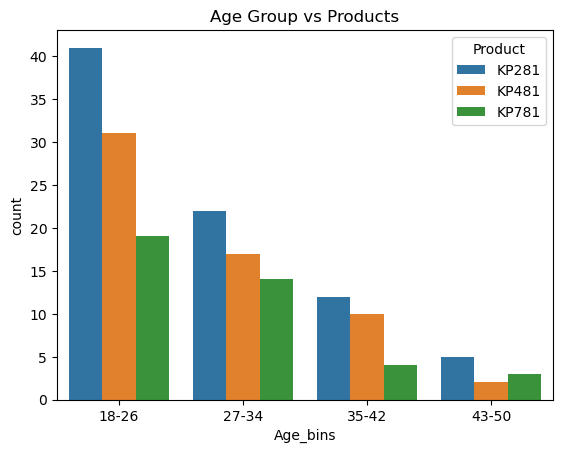

In [149]:
# Count plot for Product vs Age
df1['Age_bins'] = pd.cut(x=df1['Age'], bins = [18, 26, 34, 42, 50], labels = ["18-26", "27-34", "35-42", "43-50"])
sns.countplot(data=df1, hue='Product', x='Age_bins')
plt.title("Age Group vs Products")
plt.show()

Young population has preferred the entry level treadmill "KP781" while middle age population has preferred all three treadmills equally.

<Axes: xlabel='Age', ylabel='Income'>

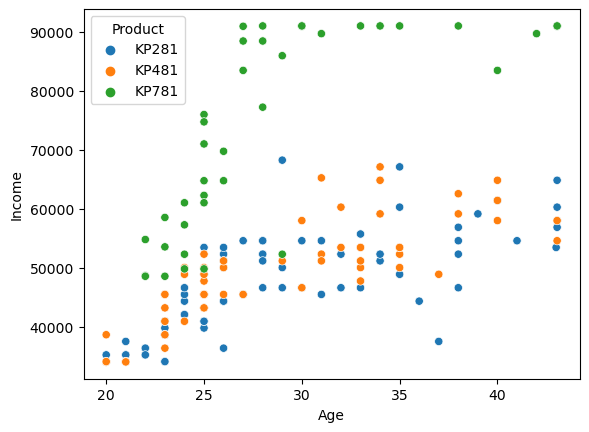

In [150]:
sns.scatterplot(data=df1, x='Age', y='Income', hue='Product')

Young adults and higher income individuals have purchased the higher end "KP781" while lower and middle income category individuals have prferred the middle and lower variant of the treadmill.

## PROBABILITIES

In [151]:
# Marginal probabilities of product categories
product_prob = pd.crosstab(index=df1['Product'], columns = 'Probability', normalize=True)

In [152]:
product_prob

col_0,Probability
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


Marginal probabilities of each product

In [153]:
pd.crosstab(index=df1['Gender'], columns = df1['Product'], normalize = True, margins=True) # marginal probability

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


Probability of buying each product based on gender

In [154]:
pd.crosstab(index=df1['Gender'], columns = df1['Product'], normalize = "index", margins=True) #conditional probability

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


Conditional Probability: P(Product | Gender). Given the gender is specified, probabilities that a particular gender buys a product

In [155]:
pd.crosstab(index=df1['Age_bins'], columns = df1['Product'], normalize = "index", margins=False) #conditional probability

Product,KP281,KP481,KP781
Age_bins,,,
18-26,0.450549,0.340659,0.208791
27-34,0.415094,0.320755,0.264151
35-42,0.461538,0.384615,0.153846
43-50,0.500000,0.200000,0.300000


Given the age of customers, probability that a customer in the given age group would buy a product.

In [156]:
#Creating a new column based on range of Income
df1['Income_Bins'] = pd.cut(df1['Income'],bins=[30000,45000,60000,75000, 100000], labels=['30k-45k', '46k-60k', '61k-75k', '76k-100k'])

In [157]:
pd.crosstab(index=df1['Income_Bins'], columns = df1['Product'], normalize = "index", margins=False) #conditional probability

Product,KP281,KP481,KP781
Income_Bins,,,
30k-45k,0.693878,0.306122,0.000000
46k-60k,0.449438,0.426966,0.123596
61k-75k,0.285714,0.333333,0.380952
76k-100k,0.000000,0.000000,1.000000


In [158]:
pd.crosstab(index=df1['MaritalStatus'], columns = df1['Product'], normalize = "index", margins=True) #conditional probability

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222


## CORRELATION

In [159]:
#List of numerical columns for correlation
corr_col = ['Age','Education','Usage','Fitness','Income','Miles']

In [160]:
#Correlation
df1[corr_col].corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.301971,0.015394,0.057361,0.514362,0.029636
Education,0.301971,1.000000,0.413600,0.441082,0.628597,0.377294
Usage,0.015394,0.413600,1.000000,0.661978,0.481608,0.771030
Fitness,0.057361,0.441082,0.661978,1.000000,0.546998,0.826307
Income,0.514362,0.628597,0.481608,0.546998,1.000000,0.537297
Miles,0.029636,0.377294,0.771030,0.826307,0.537297,1.000000


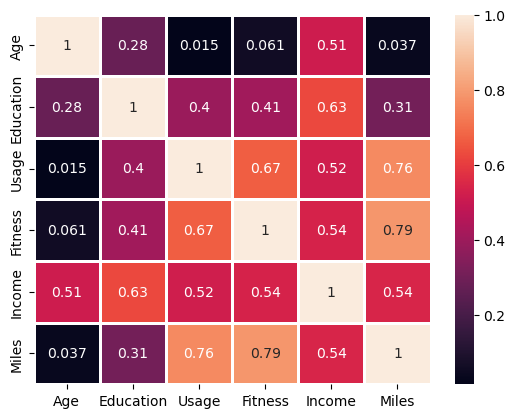

In [161]:
sns.heatmap(df[corr_col].corr(),annot=True,linewidths=1)
plt.show()

C:\Users\ShubhamYeole\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

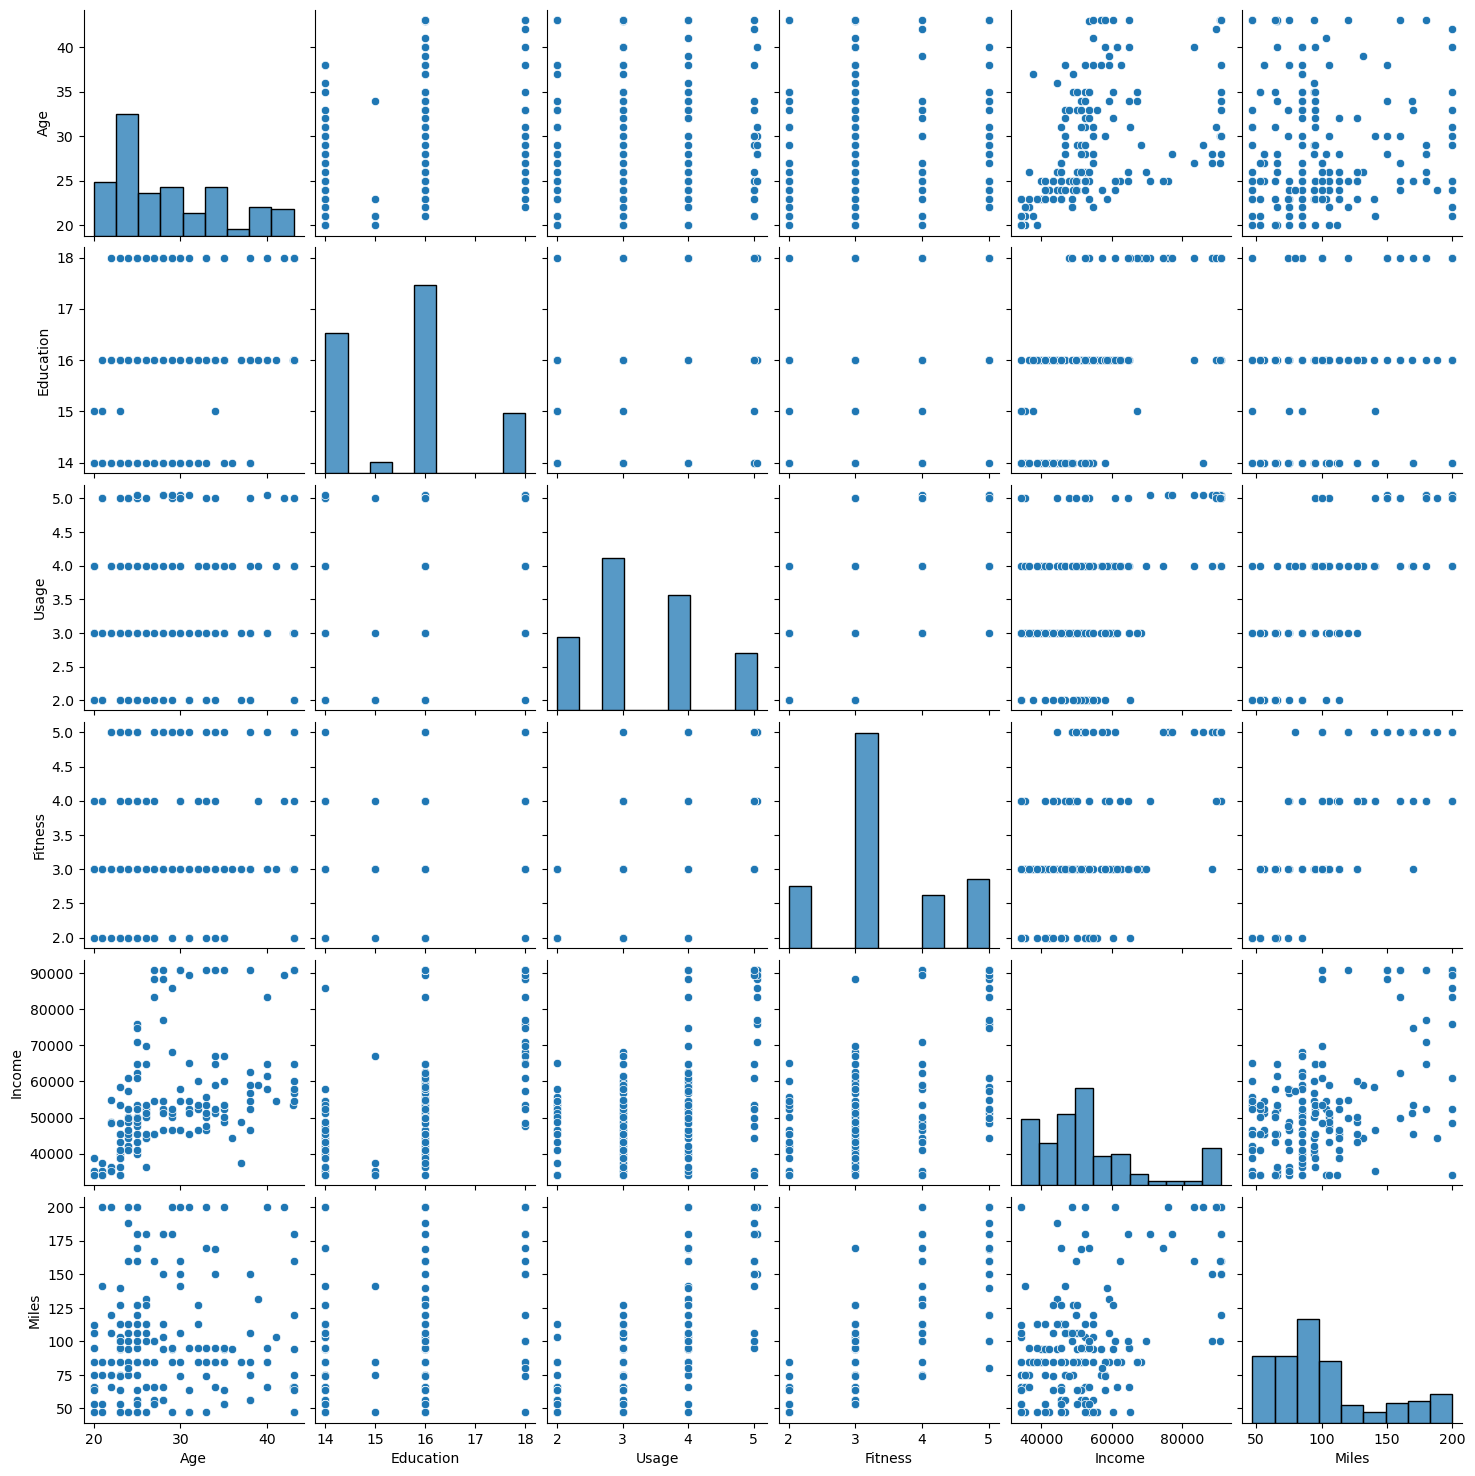

In [162]:
plt.figure(figsize=(12,6))
sns.pairplot(df1[corr_col])
plt.show()

## Customer Profiling

In [163]:
# Separating data for each product type
kp281_data = df1[df1['Product'] == 'KP281']
kp481_data = df1[df1['Product'] == 'KP481']
kp781_data = df1[df1['Product'] == 'KP781']


In [164]:
# KP281 Profiling
kp281_age = kp281_data['Age'].median()
kp281_gender = kp281_data['Gender'].mode()[0]
kp281_edu = round(kp281_data['Education'].median())
kp281_marital = kp281_data['MaritalStatus'].mode()[0]
kp281_usage = round(kp281_data['Usage'].median())
kp281_fit = round(kp281_data['Fitness'].median())
kp281_inc = kp281_data['Income_Bins'].mode()[0]
kp281_miles = round(kp281_data['Miles'].mean())


In [165]:
print("Customer Profiling for KP281\n")
print('Age:', kp281_age, '\nGender: ', kp281_gender, "\nEducation:", kp281_edu, "\nkp281_marital:", kp281_marital, "\nUsage:", kp281_usage, "\nFitness:", kp281_fit, "\nIncome:", kp281_inc, "\nMiles:", kp281_miles )

Customer Profiling for KP281

Age: 26.0 
Gender:  Female 
Education: 16 
kp281_marital: Partnered 
Usage: 3 
Fitness: 3 
Income: 46k-60k 
Miles: 83


In [166]:
# KP481 Profiling
kp481_age = kp481_data['Age'].median()
kp481_gender = kp481_data['Gender'].mode()[0]
kp481_edu = round(kp481_data['Education'].median())
kp481_marital = kp481_data['MaritalStatus'].mode()[0]
kp481_usage = round(kp481_data['Usage'].median())
kp481_fit = round(kp481_data['Fitness'].median())
kp481_inc = kp481_data['Income_Bins'].mode()[0]
kp481_miles = round(kp481_data['Miles'].mean())

In [167]:
print("Customer Profiling for KP481\n")
print('Age:', kp481_age, '\nGender: ', kp481_gender, "\nEducation:", kp481_edu, "\nkp281_marital:", kp481_marital, "\nUsage:", kp481_usage, "\nFitness:", kp481_fit, "\nIncome:", kp481_inc, "\nMiles:", kp481_miles )

Customer Profiling for KP481

Age: 26.0 
Gender:  Male 
Education: 16 
kp281_marital: Partnered 
Usage: 3 
Fitness: 3 
Income: 46k-60k 
Miles: 88


In [168]:
# KP781 Profiling
kp781_age = kp781_data['Age'].median()
kp781_gender = kp781_data['Gender'].mode()[0]
kp781_edu = round(kp781_data['Education'].median())
kp781_marital = kp781_data['MaritalStatus'].mode()[0]
kp781_usage = round(kp781_data['Usage'].median())
kp781_fit = round(kp781_data['Fitness'].median())
kp781_inc = kp781_data['Income_Bins'].mode()[0]
kp781_miles = round(kp781_data['Miles'].mean())

In [169]:
print("Customer Profiling for KP781\n")
print('Age:', kp781_age, '\nGender: ', kp781_gender, "\nEducation:", kp781_edu, "\nkp281_marital:", kp781_marital, "\nUsage:", kp781_usage, "\nFitness:", kp781_fit, "\nIncome:", kp781_inc, "\nMiles:", kp781_miles )

Customer Profiling for KP781

Age: 27.0 
Gender:  Male 
Education: 18 
kp281_marital: Partnered 
Usage: 5 
Fitness: 5 
Income: 76k-100k 
Miles: 156


## Observations

1. **Data Overview:**
   - The dataset contains information on 180 treadmill purchases, with 9 columns capturing details such as product type, age, gender, education, marital status, usage, income, fitness rating, and expected weekly miles.
   - No missing values were found in the dataset.
   
   

2. **Descriptive Statistics:**
   - Descriptive statistics revealed insights into the central tendency and spread of numerical columns.
   - Mean-Median Differences:
      - Age shows a slight right-skewed distribution.
      - Education has a negative difference, indicating a left-skewed distribution.
      - Usage and Fitness also show right-skewed distributions.
      - Income has a positive difference, indicating a right-skewed distribution.
      - Miles have a positive difference, suggesting a right-skewed distribution.
      
      

3. **Outliers Detection and Treatment:**
   - Outliers were identified using boxplots and the "describe" method.
   - The data between the 5th and 95th percentiles was retained using the 'np.clip()' method to address outliers.
   
   

4. **Distribution of Products:**
   - The distribution of product types shows that KP281 is the most popular (44.4%), followed by KP481 (33.3%) and KP781 (22.2%).


5. **Exploratory Data Analysis (EDA):**
   - Age Distribution: The age distribution peaks between 20 and 28 years, with a decline thereafter.
   - Marital Status vs. Products: Partnered individuals tend to purchase more treadmills across all product categories.


6. **Probability Analysis:**
   - Marginal Probability of Products:
     - KP281: 44.4%
     - KP481: 33.3%
     - KP781: 22.2%
   - Conditional Probability (Gender vs. Product):
     - Males are more likely to purchase KP781 compared to females.
   - Conditional Probability (Age vs. Product):
     - Young adults (18-26) prefer KP281, while those in the age range 43-50 show a preference for KP781.
   - Conditional Probability (Income vs. Product):
     - Higher income individuals (76k-100k) prefer KP781, while the lower income group (30k-45k) leans towards KP281.


7. **Customer Profiling:**
   - **KP281 Customer Profile:**
     - Age: 26, Female, Education: 16, Marital Status: Partnered, Usage: 3, Fitness: 3, Income: 46k-60k, Miles: 83.
   - **KP481 Customer Profile:**
     - Age: 26, Male, Education: 16, Marital Status: Partnered, Usage: 3, Fitness: 3, Income: 46k-60k, Miles: 88.
   - **KP781 Customer Profile:**
     - Age: 27, Male, Education: 18, Marital Status: Partnered, Usage: 5, Fitness: 5, Income: 76k-100k, Miles: 156.



## Recommendations


1. Given the preference for KP281 among young adults (18-26), marketing efforts should focus on this age group.



2. As partnered individuals show a higher inclination to purchase treadmills, targeted advertising and promotions can be tailored to this demographic.
3. Higher-end products like KP781 attract customers with higher incomes. Adjust marketing strategies to highlight advanced features for this group.
4. Develop marketing campaigns that highlight specific product features appealing to each customer segment.
5. Highlight the suitability of KP781 for individuals who prioritize high usage and intense fitness levels. Emphasize advanced fitness features for this segment.
6. Provide online guides or tutorials on how to maximize the usage of each treadmill model, addressing different fitness goals and user needs.
